In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import pandas as pd
import sklearn.linear_model
from scipy import signal, ndimage

In [2]:
datasheet = pd.read_csv("2022-05-05_14-55-25.csv", delimiter=";", index_col=0)

In [3]:
displaced = datasheet.copy()
for i in range (0,4):
    displaced[f"ch{i}"] = displaced[f"ch{i}"] - 2048
displaced

,ch0,ch1,ch2,ch3
gesture,,,,
hand_open,16,72,244,77
hand_open,68,16,160,-212
hand_open,60,40,201,-170
hand_open,48,136,92,-668
hand_open,47,-40,203,248
...,...,...,...,...
hand_flex_curl,-112,9,-56,184
hand_flex_curl,-36,174,214,-690
hand_flex_curl,140,396,488,23


In [4]:
displaced.to_csv("displaced.csv")

In [20]:
for i in range(0,4):
    plt.plot(range(0,1090), displaced[f"ch{i}"][:1090])
    plt.plot(range(1090, 2090), displaced[f"ch{i}"][1090:2090])
    plt.suptitle("Original line Plot")
    plt.title(f"Channel {i}")
    plt.savefig(f"graphs/displaced/displaced-line-ch{i}.png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [5]:
median = displaced.copy()

for i in range(0,4):
    median[f"ch{i}"] = signal.medfilt(median[f"ch{i}"], 9) 
    
median.to_csv("median.csv")

In [28]:
for i in range(0,4):
    plt.plot(range(0,1090), median[f"ch{i}"][:1090])
    plt.plot(range(1090, 2090), median[f"ch{i}"][1090:2090])
    plt.suptitle("Filtered Line Plot")
    plt.title(f"Channel {i}")
    plt.savefig(f"graphs/median/median-line-ch{i}.png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [6]:
mov_avg = median.copy()

mov_avg['ch0'] = median.ch0.rolling(100).mean()
mov_avg['ch1'] = median.ch1.rolling(100).mean()
mov_avg['ch2'] = median.ch2.rolling(100).mean()
mov_avg['ch3'] = median.ch3.rolling(100).mean()
    
mov_avg.to_csv('mov_avg.csv')

In [30]:
for i in range(0,4):
    plt.plot(range(0,1090), mov_avg[f"ch{i}"][:1090])
    plt.plot(range(1090, 2090), mov_avg[f"ch{i}"][1090:2090])
    plt.suptitle("Moving Average Line Plot")
    plt.title(f"Channel {i}")
    plt.savefig(f"graphs/mov_avg/mov_avg-line-ch{i}.png")
    plt.clf()
    
for i in range(0,4):
    plt.scatter(range(0,1090), mov_avg[f"ch{i}"][:1090], s=2)
    plt.scatter(range(1090, 2090), mov_avg[f"ch{i}"][1090:2090], s=2)
    plt.suptitle("Moving Average Scatter Plot")
    plt.title(f"Channel {i}")
    plt.savefig(f"graphs/mov_avg/mov_avg-scatter-ch{i}.png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

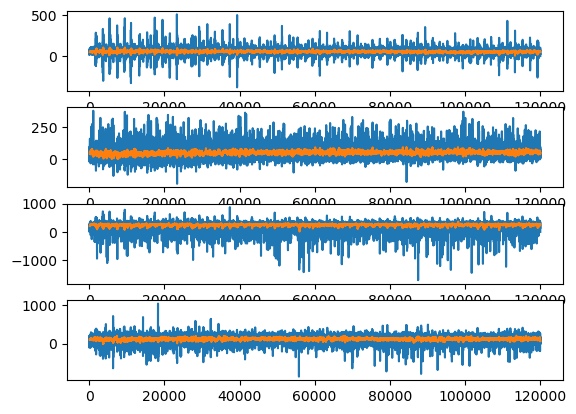

In [31]:
fig, axes = plt.subplots(4,1)

for i in range(0,4):
    axes[i].plot(range(len(median[f'ch{i}'])), median[f'ch{i}'])
    axes[i].plot(range(len(mov_avg[f'ch{i}'])), mov_avg[f'ch{i}'])

In [9]:
for i in range(0,4):
    plt.plot(range(0,2090), displaced[f'ch{i}'][:2090])
    plt.plot(range(0,2090), mov_avg[f'ch{i}'][:2090])
    plt.suptitle(f'Comparison Rolling mean and median graphs ch{i + 1}')
    plt.title("comparison between the first 2090 values of both graphs")
    plt.savefig(f"graphs/comparisons/comparison-line-ch{i + 1}.png")
    plt.clf()

<Figure size 640x480 with 0 Axes>